<a href="https://colab.research.google.com/github/sakeefkarim/cand3_intro_python/blob/main/notebooks/Plotting_with_Seaborn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# A Quick Introduction to **`seaborn`**

Sakeef M. Karim

*April 13, 2022*

<br>

This notebook provides a _high-level_ overview of how to generate basic charts—from scatterplots to heatmaps—using the [`seaborn`](https://seaborn.pydata.org/) library in Python. Along the way, we’ll be leveraging functions from [`pandas`](https://pandas.pydata.org/), [`matplotlib`](https://matplotlib.org/) and cognate libraries to modify our data, customize our plotting aesthetics and export our visualizations.


## Preliminaries


In [ ]:
import numpy as np
import scipy as sp
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

To [reiterate](https://colab.research.google.com/drive/17SWEs0aRX70KVKBbpjeBo8_Lyy5d8Elc?usp=sharing): we can _mount_ our Google Drive folders onto a Colab session to save plots, data sets and so on. To programmatically mount your Drive folder(s), run the following lines:

In [ ]:
from google.colab import drive
drive.mount('/drive')

Mounted at /drive


To keep things simple, we're going to play around with `gapminder` to produce our visualizations — a data frame we've already encountered in `R`. To this end, let's install the `gapminder` package using [pip](https://pypi.org/project/pip/).

In [ ]:
!pip install gapminder

from gapminder import gapminder

# Inspecting the first five rows:

gapminder.head()

,country,continent,year,lifeExp,pop,gdpPercap
0,Afghanistan,Asia,1952,28.801,8425333,779.445314
1,Afghanistan,Asia,1957,30.332,9240934,820.853030
2,Afghanistan,Asia,1962,31.997,10267083,853.100710
3,Afghanistan,Asia,1967,34.020,11537966,836.197138
4,Afghanistan,Asia,1972,36.088,13079460,739.981106


# Cleaning 

Before we generate any plots, we'll have to _slightly_ modify our input data frame. The cell below features some basic code that'll (i) truncate the `gapminder` data set (i.e., by zeroing-in on a single year); and (ii) introduce a few new variables. The annotations interspersed throughout the cell provide additional details about the functions (or _methods_) we'll be using to arrive at our desired data frame.

**Note**: We'll make additional modifications as we work our way down the notebook!

In [ ]:
# To simplify matters, let's zero-in on the latest year in the gapminder data set:

df = gapminder[ gapminder['year'] == 2007].reset_index(drop=True)

# The year variable's no longer necessary! Let's drop it:

df.drop(columns='year', 
        # The inplace parameter executes the command "quietly" — i.e.,
        # no output is displayed and the results do not have to be stored in a 
        # new object:
        inplace=True)

# Let's rename some columns

df.rename(columns={# Existing column name : new column name
                   'gdpPercap':'gdp_pc', 
                   'lifeExp':'le'}, inplace=True)

# For illustrative purposes, let's generate a new variable that takes the log of
# per capita GDP:

df['ln_gdp'] = np.log(df['gdp_pc'])

# Discretizing population size and per capita GDP into new quintile measures:

df['pop_quintile'] = pd.qcut(df['pop'], q = 5, labels=False) + 1

df['gdp_quintile'] = pd.qcut(df['gdp_pc'], q = 5, labels=False) + 1

# Using quintile measures to create binary indicators (for our visualizations)

df['size'] = np.where(df['pop_quintile'] > 4, 'Large', 'Small or Medium')

df['wealth'] = np.where(df['gdp_quintile'] > 3, 'Top 2 Quintiles', 'Bottom 3 Quintiles')

# Transforming quintile measures into "objects" (or string variables)

df[['pop_quintile', 'gdp_quintile']] = df[['pop_quintile', 'gdp_quintile']].astype(str)

# Example of how to set object order:

df['gdp_quintile'] = pd.Categorical(df['gdp_quintile'], ['1','2','3','4','5'])

# Exploratory Visualizations

The `pairplot` function allows users to easily visualize the pairwise associations between *all* the numeric variables in a data frame. This can be especially helpful for conducting [exploratory data analyses](https://www.datacamp.com/community/tutorials/exploratory-data-analysis-python).

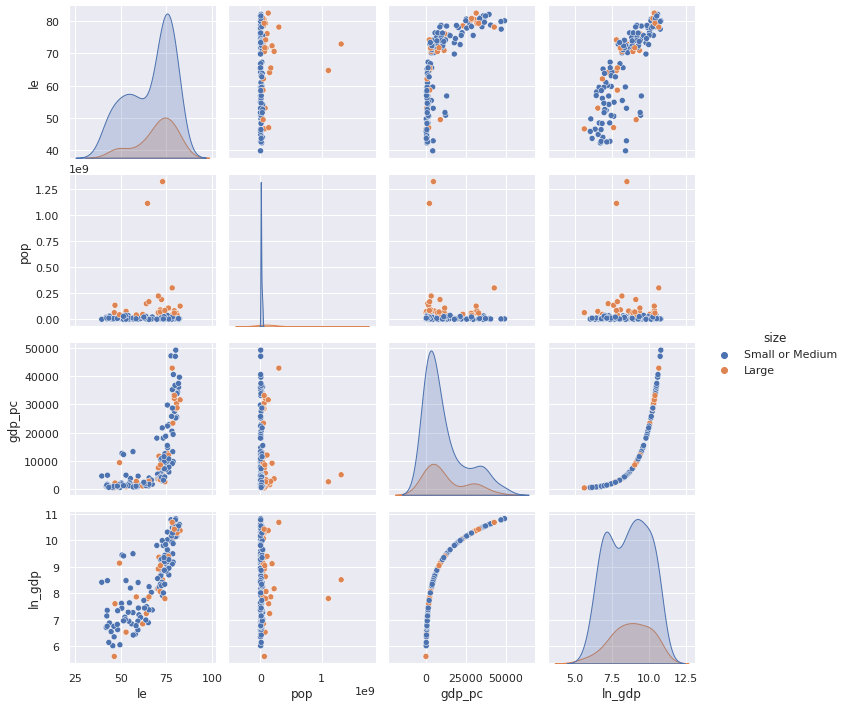

In [ ]:
# This unlocks seaborn's basic 'dark grid' theme:

sns.set_theme()

# Other seaborn themes: http://seaborn.pydata.org/tutorial/aesthetics.html#seaborn-figure-styles

sns.pairplot(df)

# The 'hue' parameter (for most seaborn functions) allows analysts to condition on a
# variable of interest:

# sns.pairplot(df, hue = 'wealth')

sns.pairplot(df, hue = 'size')

# Basic Scatterplots

As the cell below illustrates, we can use `matplotlib` functions in conjunction with `seaborn` to modify and export our visualizations.

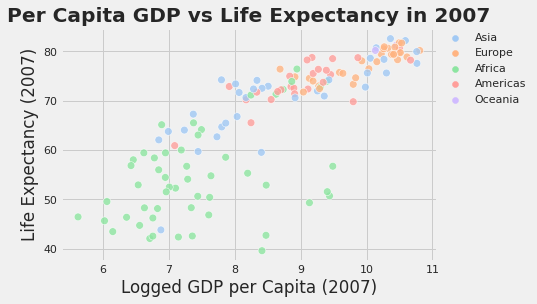

In [ ]:
mpl.style.use('fivethirtyeight')

# Basic scatterplot

p1 = sns.scatterplot(x = 'ln_gdp', y = 'le', 
                     hue = 'continent', 
                     # For more seaborn palettes, see https://seaborn.pydata.org/tutorial/color_palettes.html.
                     palette = 'pastel', 
                     # Size parameter:
                     s = 60, 
                     # Transparency parameter:
                     alpha = 0.8,
                     data = df)

p1.set_title('Per Capita GDP vs Life Expectancy in 2007', 
             weight = 'bold')

p1.set(xlabel='Logged GDP per Capita (2007)', 
       ylabel='Life Expectancy (2007)')

plt.legend(loc='upper right', 
           # Two elements correspond to x and y coordinates:
           bbox_to_anchor= (1.25, 1),
           # Remove legend frame:
           frameon=False, 
           borderaxespad=0)

plt.savefig('/drive/My Drive/Python/new_fig.png', 
            dpi = 300, 
            # Making sure the image isn't cropped!
            bbox_inches='tight')

plt.show()

**Optional**: Below, you'll find supplemental code for modifying scales and formatting axis labels. To run the code, un-annotate the lines in the cell by removing the `#` sign.

In [ ]:
# p1b = sns.scatterplot(x = 'gdp_pc', y = 'le', data = df)

# p1b.set_xscale("log")

# p1c = sns.scatterplot(x = 'gdp_pc', y = 'le', data = df)

# p1c.get_xaxis().set_major_formatter(mpl.ticker.FuncFormatter(lambda x, y: format(int(x), ',')))

# plt.show()

### Adding Regression Lines to Scatterplots

The `lmplot` function can be used to visualize linear relationships between variables. It can allow map _interactions_ or spotlight conditional relationships (or heterogeneous treatment effects) using faceted grids. 

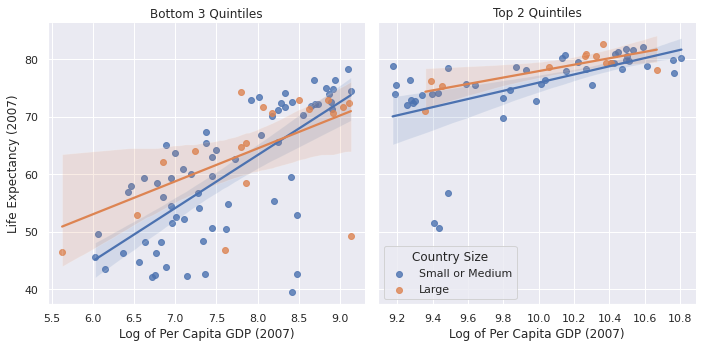

In [ ]:
sns.set_theme()

p2 = sns.lmplot(x='ln_gdp', y='le', 
                hue = 'size',
                # Unlocks facets/conditional panels:
                col = 'wealth',
                # Equivalent to scales = free_x in ggplot:
                facet_kws=dict(sharex=False),
                data=df)

# Removing the legend automatically generated via lmplot 
# (so we can use mpl functions to manipulate our legend instead):

p2._legend.remove()

# Removing the "variable name =" text from facet text:

p2.set_titles('{col_name}')

p2.set_axis_labels(x_var="Log of Per Capita GDP (2007)", 
                   y_var='Life Expectancy (2007)')

plt.legend(title='Country Size')

plt.show()

# Barplots

In the example below, we're going to modify our data frame by removing observations from Oceania. Then, we'll generate a grouped horizontal barplot that maps variation in life expectancy _across_ continents and illustrates how this variation is patterned by "wealth." 

**Note**: The measure of "wealth" here is, of course, quite crude!

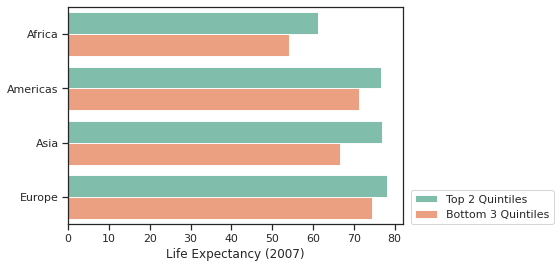

In [ ]:
sns.set(style='ticks', palette='Set2')

# Removing Oceania (few observations):

df_2 = df[df.continent != 'Oceania']

# Generating array corresponding to desired (alphabetical) x-axis order:

order_plot = df_2['continent'].sort_values().unique()

p3 = sns.barplot(x='le', y='continent', 
                 # To create a grouped bar plot:
                 hue = 'wealth',
                 # Removing confidence intervals ...
                 ci=None,
                 alpha = 0.9,
                 hue_order = ['Top 2 Quintiles', 'Bottom 3 Quintiles'],
                 order = order_plot,
                 data=df_2)

p3.set(xlabel='Life Expectancy (2007)', ylabel='')

plt.legend(loc='lower right', 
           bbox_to_anchor= (1.45, 0), 
           borderaxespad=0)

# Boxplots

Boxplots are a wonderful way to visualize distributions. Manipulating your `x` and `y` arguments can help you iterate between vertical and horizontal (boxplot) representations of the same underlying data.

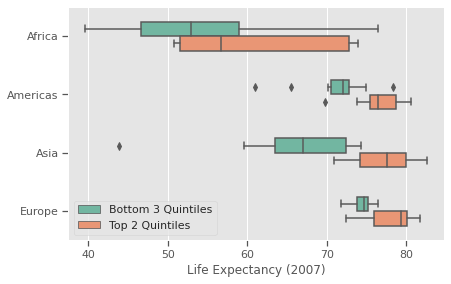

In [ ]:
mpl.style.use('ggplot')

p4 = sns.boxplot(x='le', y='continent', data=df_2,
                 width=0.5, 
                 hue = 'wealth',
                 palette="Set2",
                 order = order_plot)

p4.set(xlabel='Life Expectancy (2007)', ylabel='')

plt.legend(title = '')

# Other Ways to Plot Distributions

The heading here is self-explanatory! Below, you'll find a few quick examples of other functions that can be leveraged to visualize distributions via `seaborn`.

## Violin Plots

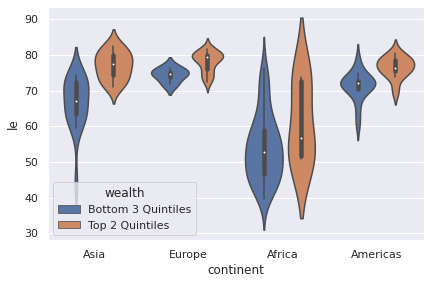

In [ ]:
sns.set_theme()

sns.violinplot(x='continent', y='le', hue='wealth',
               #split = True,
               data=df_2)

## Histograms

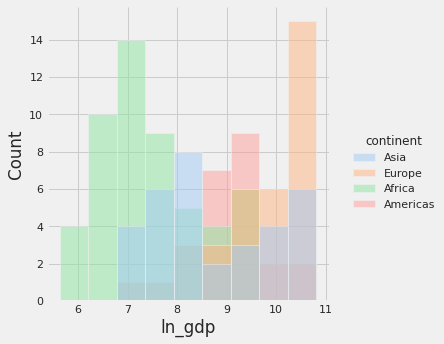

In [ ]:
sns.set_theme(style = 'whitegrid')

sns.histplot(x='gdp_quintile',
             hue = 'continent',
             hue_order = order_plot,
             multiple = 'dodge',
             linewidth=.05, data = df_2)

sns.displot(x= 'ln_gdp', 
            hue='continent',
            kind='hist', 
            multiple = 'layer',
            palette = 'pastel',
            data = df_2)

## Joint Plots


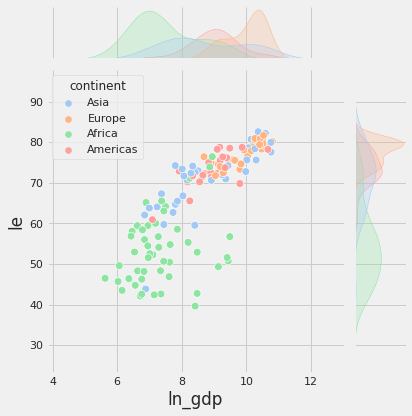

In [ ]:
mpl.style.use('fivethirtyeight')

sns.jointplot(x = 'ln_gdp', y = 'le', 
              hue = 'continent', 
              palette = 'pastel',
              s = 60,
              data = df_2)

## Density Plots

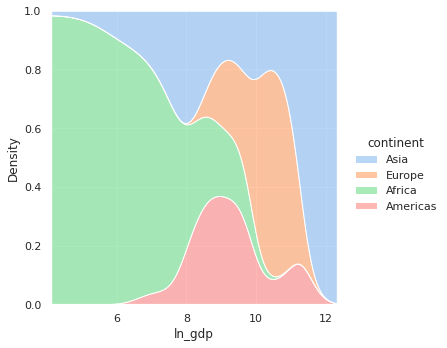

In [ ]:
sns.set_theme()

sns.displot(x= 'ln_gdp', 
            hue='continent',
            #Kernel Density Estimate
            kind='kde', 
            multiple = 'fill',
            palette = 'pastel',
            data = df_2)

# Heatmaps

To generate a heatmap in `seaborn`, we'll have to modify our input data frame once again. To make matters easier, let's return to the `gapminder` data frame and modify our data by:

+ Isolaing countries in the Americas.
+ Isolating the following variables: `country`, `year` and `lifeExp`.
+ Reshaping our data from long to wide using the `pivot` method.

In [ ]:
# Isolating countries in the Americas:

df_3 = gapminder[ gapminder['continent'] == 'Americas']

# Zeroing-in on variables of interest:

df_3 = df_3[['country', 'year', 'lifeExp']]

# Pivoting to wide format

df_3 = df_3.pivot(index = 'country', columns = 'year', values = 'lifeExp')

With these modifications in place, let's generate a quick heatmap that captures how life expectancy in the Americas has changed over time:

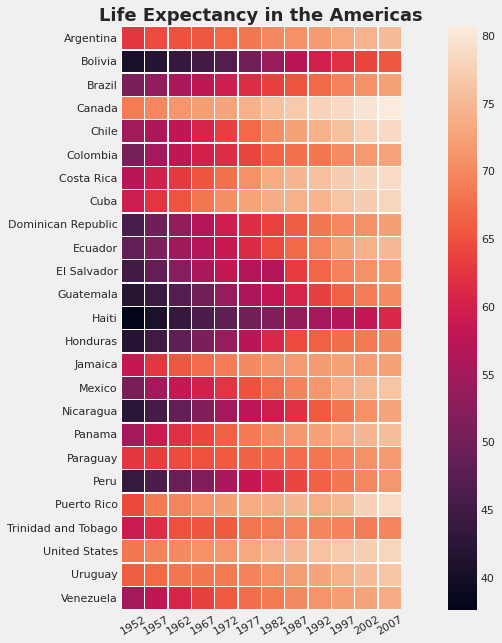

In [ ]:
mpl.style.use('fivethirtyeight')

p5 = sns.heatmap(df_3, 
                 linewidths =0.5, 
                 # Includes all y-tick labels:
                 yticklabels=True,
                 square=True)

# Rotates x-axis labels (to enhance legibility):

plt.xticks(rotation=30) 

p5.set(xlabel='', ylabel='')

p5.set_title('Life Expectancy in the Americas', 
             size = 18,
             weight = 'bold')

# Changing the plot's dimensions:

plt.gcf().set_size_inches(15, 10)

plt.savefig('/drive/My Drive/Python/new_heatmap.png', bbox_inches='tight', dpi = 300)

# Line Plots

Finally, here are two functions we can use to generate line plots via `seaborn`. Since line plots lend themselves to summarizing time series data, we'll use the original `gapminder` data frame as our input.

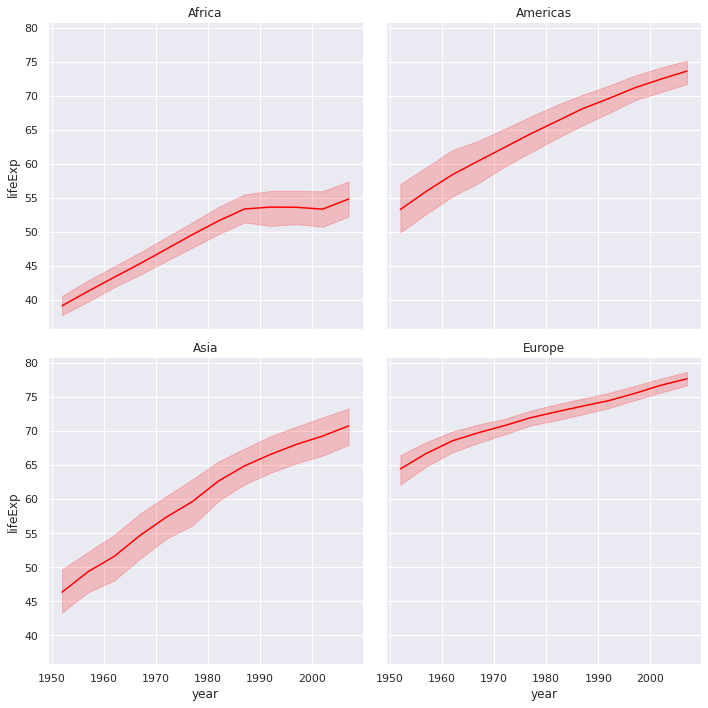

In [ ]:
# Using the full gapminder data frame:

sns.lineplot(x='year', y='lifeExp', 
             hue = 'continent',
             hue_order = order_plot,
             data = gapminder)

# Facets:

p6 = sns.relplot(x='year', y='lifeExp', 
                 col='continent', 
                 col_order = order_plot,
                 col_wrap = 2,
                 kind='line', 
                 palette='Set2',
                 color = 'red',
                 data = gapminder)

p6.set_titles('{col_name}')